# Exploratory Data Analysis

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [5]:
# items
items = pd.read_csv("items.csv")
print(f"nulls: {items.isna().sum().sum()}")
print(f"duplucates: {len(items) - len(items.drop_duplicates())}")
print(f"shape: {items.shape}")
items.head()

nulls: 0
duplucates: 0
shape: (22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
# item categories
categories = pd.read_csv("item_categories.csv")
print(f"nulls: {categories.isna().sum().sum()}")
print(f"duplucates: {len(categories) - len(categories.drop_duplicates())}")
print(f"shape: {categories.shape}")
categories.head()

nulls: 0
duplucates: 0
shape: (84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
# sales
df = pd.read_csv("sales_train.csv")
print(f"nulls: {df.isna().sum().sum()}")
print(f"duplucates: {len(df) - len(df.drop_duplicates())}")
print(f"shape: {df.shape}")
df.head()

nulls: 0
duplucates: 6
shape: (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


## Convert to Time Series

In [11]:
# change date to datetime
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# make date the index
df.set_index('date', drop=True, inplace=True)

df.head(1)

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-02,0,59,22154,999.0,1.0


In [17]:
# groupby month
gb = df.groupby('date_block_num')

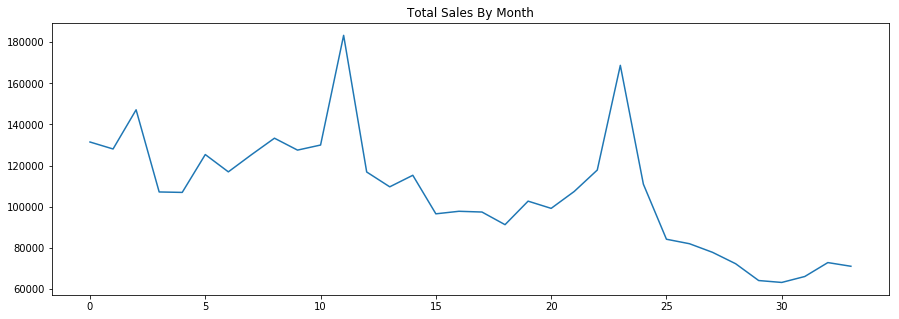

In [18]:
# make a time series of total sales
ts = gb['item_cnt_day'].sum()

# plot time series
plt.figure(figsize=(15, 5))
plt.plot(ts)
plt.title('Total Sales By Month')
plt.show()